## SHAP values

In [2]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import shap
shap.initjs()
import xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    train_test_split,
)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
    
from sklearn.linear_model import LinearRegression

In [2]:
DATADIR = '/home/dauenha0/murp1677/Cyclic_Dynamics/Code/ML_repo/programmable-catalysis/dev/data/'

---
## Classification

In [20]:
# load data and remove non-steady state data 
model = joblib.load(os.path.join(DATADIR,'pkls/op_steady/xgb_clf_op-best-estm.pkl'))

data_file = os.path.join(DATADIR, 'csvs/240313_op_steady.csv')
df_orig = pd.read_csv(data_file)

df = df_orig.copy()
df['direction'] = pd.cut(df['loop-tof'], bins=[-float('inf'), -1e-4, 1e-4, float('inf')], labels=[2, 0, 1])

# identify targets and features
targets = ['direction','loop-tof']

non_features = ['steady-state-condition']
columns = list(df)
features = [f for f in columns if f not in targets if f not in non_features]

# Label features and target
X, y = df[features].values, df[targets].values

# Split data --> reserving 15% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=22)

# fit the model to training data
fit = model.fit(X_train, y_train[:,0])

In [ ]:
# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [31]:
model = joblib.load(os.path.join(DATADIR,'pkls/op_steady/xgb_clf_op-best-estm.pkl'))

In [19]:
features

['alpha-a',
 'alpha-b',
 'alpha-c',
 'beta-a',
 'beta-b',
 'beta-c',
 'gamma-b-a',
 'gamma-c-a',
 'delta-b-a',
 'delta-c-a',
 'change-in-bea']

TypeError: only integer scalar arrays can be converted to a scalar index

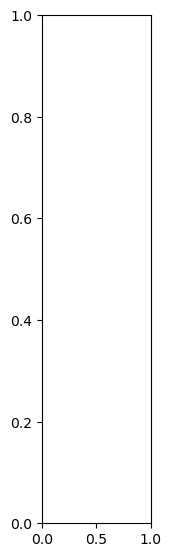

In [32]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=features, show=False)
ax = plt.gca()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
plt.savefig('clf-rc-shap-bar-plot-dim0.png')

#shap.summary_plot(shap_values[:,:,1], X, plot_type="bar", feature_names=features, show=False)
#plt.savefig('clf-op-shap-bar-plot-dim1.png')

#shap.summary_plot(shap_values[:,:,2], X, plot_type="bar", feature_names=features, show=False)
#plt.savefig('clf-op-shap-bar-plot-dim2.png')

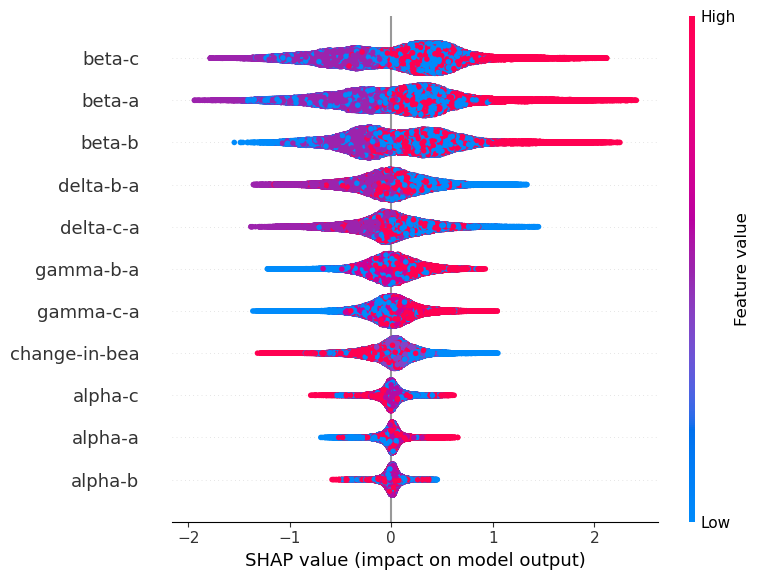

In [33]:
# summary plots
shap.summary_plot(shap_values[:,:,0], X, feature_names=features, show=False)
plt.tight_layout()
plt.savefig('clf-op-shap-summary-plot-dim0.tiff', dpi=300)

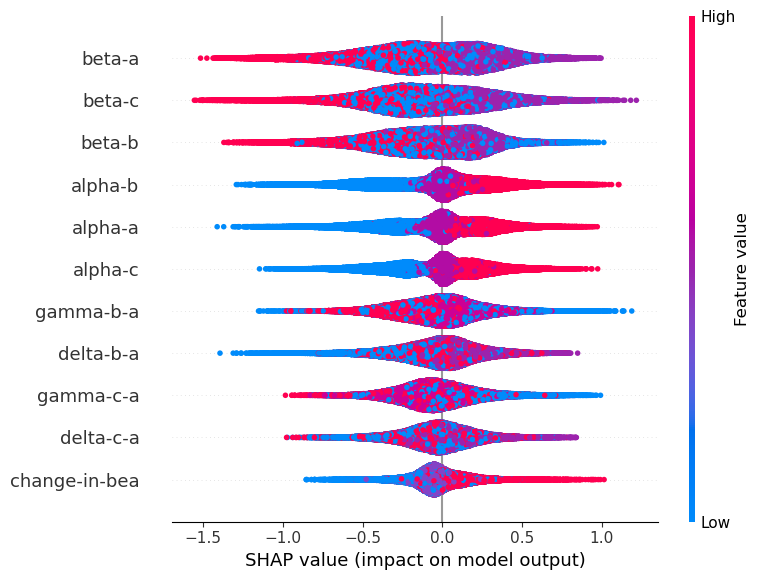

In [34]:
shap.summary_plot(shap_values[:,:,1], X, feature_names=features, show=False)
plt.tight_layout()
plt.savefig('clf-op-shap-summary-plot-dim1.tiff', dpi=300)

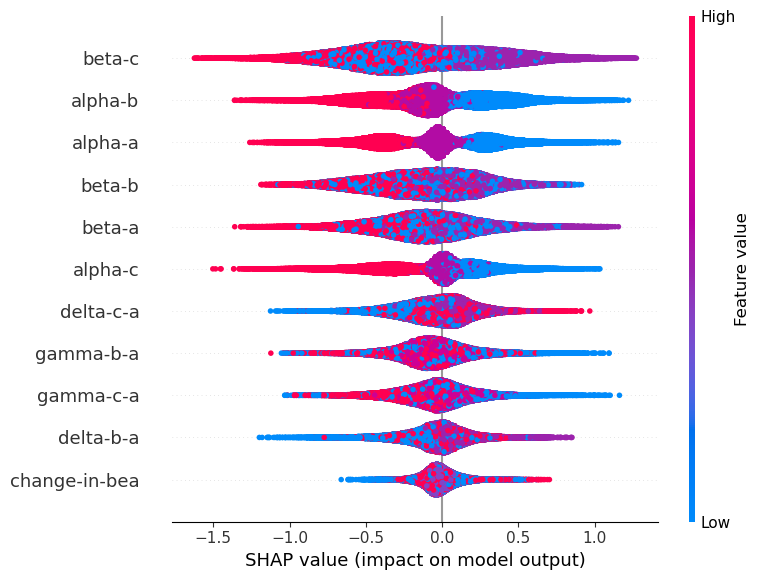

In [35]:
shap.summary_plot(shap_values[:,:,2], X, feature_names=features, show=False)
plt.tight_layout()
plt.savefig('clf-op-shap-summary-plot-dim2.tiff', dpi=300)

In [7]:
#Attempt to use SHAP on multi-class
# choose sample idx
idx = 0

for which_class in range(0,3):
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[idx, :, which_class], X[idx, :]))
    
#Display all features and SHAP values
df0 = pd.DataFrame(data=X[idx, :].reshape(1, -1), columns=features, index=["Feature Values"])
df1=pd.DataFrame(data=shap_values[idx, :, 0].reshape(1, -1), columns=features, index=["Class 0"])
df2=pd.DataFrame(data=shap_values[idx, :, 1].reshape(1, -1), columns=features, index=["Class 1"])
df3=pd.DataFrame(data=shap_values[idx, :, 2].reshape(1, -1), columns=features, index=["Class 2"])
df=pd.concat([df0,df1,df2,df3])
display(df.transpose())

,Feature Values,Class 0,Class 1,Class 2
alpha-a,0.2,-0.211637,-0.277892,0.313859
alpha-b,0.2,-0.016345,-0.225379,0.089024
alpha-c,0.2,0.143112,-0.335053,0.027009
beta-a,0.6,-0.620892,0.324004,-0.059561
beta-b,0.6,-0.971428,0.442728,0.245198
beta-c,0.6,-0.650483,0.041694,0.386592
gamma-b-a,0.6,-0.254553,-0.076372,-0.028877
gamma-c-a,0.6,-0.240007,0.254531,-0.289106
delta-b-a,0.5,0.035863,0.254574,-0.459532
delta-c-a,0.5,-0.029352,-0.016991,0.003298


---
## Regression

In [3]:
# load data and remove non-steady state data 
model = joblib.load(os.path.join(DATADIR,'pkls/op_steady/xgb_reg_op-best-estm.pkl'))

data_file = os.path.join(DATADIR, 'csvs/240313_op_steady.csv')
df_orig = pd.read_csv(data_file)

df = df_orig.copy()
df['direction'] = pd.cut(df['loop-tof'], bins=[-float('inf'), -1e-4, 1e-4, float('inf')], labels=[2, 0, 1])

# identify targets and features
targets = ['direction','loop-tof']

non_features = ['steady-state-condition']
columns = list(df)
features = [f for f in columns if f not in targets if f not in non_features]

# Label features and target
X, y = df[features].values, df[targets].values

# Split data --> reserving 15% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=22)

# fit the model to training data
fit = model.fit(X_train, y_train[:,0])

In [4]:
# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

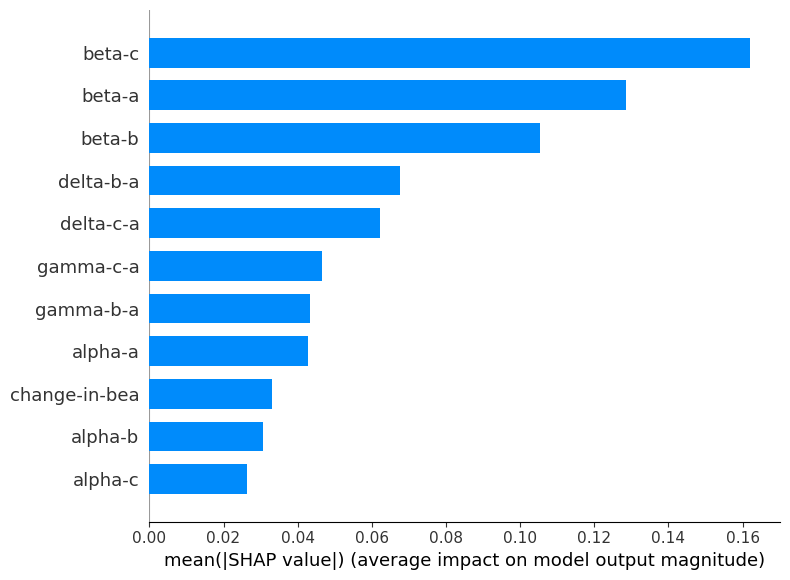

In [26]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=features, show=False)
plt.savefig('reg-op-shap-bar-plot.png')

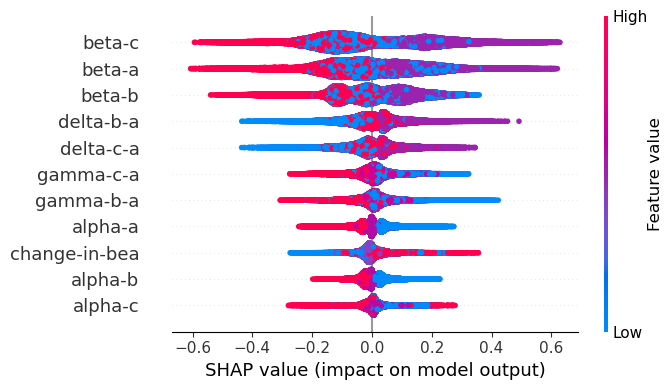

In [19]:
# summary plots
shap.summary_plot(shap_values, X, feature_names=features, show=False, plot_size=[7,4])
plt.tight_layout()
plt.savefig('reg-op-shap-summary-plot.tiff', dpi=300)